# 졸음운전 데이터 분석

https://longing-purple-d41.notion.site/4-72b66f9685f74318838222debf29b427



In [1]:
import pandas as pd
import numpy as np
from datetime import datetime # datetime 안에 있는 datetime 모듈 함수만 사용

In [2]:
data1 = pd.read_csv('E:/[ICT] Webai/2014년 졸음운전 교통사고.csv', encoding='cp949')
data2 = pd.read_csv('E:/[ICT] Webai/2015년 졸음운전 교통사고.csv', encoding='cp949')
data3 = pd.read_csv('E:/[ICT] Webai/2016년 졸음운전 교통사고.csv', encoding='cp949')

In [3]:
## 파일 합치기 (concat)

data = pd.concat([data1,data2,data3])

## 인데스 넘버가 사라지고 선택한 컬럼('구분')을 인덱스로 보냄
data.set_index('구분', inplace=True) 
data.head()

,사고(건),사망(명),부상(명)
구분,,,
2014년1월,169,7,347
2014년2월,145,3,268
2014년3월,206,12,358
2014년4월,182,4,360
2014년5월,218,17,474


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 2014년1월 to 2016년12월
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   사고(건)   36 non-null     int64
 1   사망(명)   36 non-null     int64
 2   부상(명)   36 non-null     int64
dtypes: int64(3)
memory usage: 1.1+ KB


In [5]:
## 년도 월별로 인덱스 설정

today = datetime.now()
print(today.year)
print(today.month)
print(today.day)

ans2 = data.copy()
## 문자형태인 날짜를 datetime 형으로 바꾼다.
ans2.index = pd.to_datetime(ans2.index, format = '%Y년%m월')
## 년도와 날짜를 인덱스로 보냄
ans2.set_index([ans2.index.year, ans2.index.month], inplace=True)
ans2.index.names = ['년도', '월']
ans2

2022
3
23


사고(건)  사망(명)  부상(명)
년도   월                      
2014 1     169      7    347
     2     145      3    268
     3     206     12    358
     4     182      4    360
     5     218     17    474
     6     233     13    457
     7     229     14    431
     8     222      9    447
     9     225     15    430
     10    210     14    392
     11    209     10    386
     12    178     12    329
2015 1     205      8    375
     2     175      8    375
     3     237      4    492
     4     227     10    486
     5     231      9    504
     6     207      8    401
     7     273      7    556
     8     268     19    534
     9     252     10    501
     10    214     14    475
     11    199      3    398
     12    213      8    428
2016 1     192      5    387
     2     174      6    328
     3     217      7    435
     4     216      7    419
     5     239     13    522
     6     200     12    362
     7     227      9    460
     8     230      7    490
     9     187     13    347
     10    183     10    367
     11    200      5    418
     12    168      4    364

In [6]:
ans2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 36 entries, (2014, 1) to (2016, 12)
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   사고(건)   36 non-null     int64
 1   사망(명)   36 non-null     int64
 2   부상(명)   36 non-null     int64
dtypes: int64(3)
memory usage: 1.6 KB


In [7]:
## 년도 및 월별 평균 사망자

y = ans2.groupby('년도').mean()[['사망(명)']]
m = ans2.groupby('년도').mean()[['사망(명)']]
print(y)
print(m)

          사망(명)
년도             
2014  10.833333
2015   9.000000
2016   8.166667
          사망(명)
년도             
2014  10.833333
2015   9.000000
2016   8.166667


In [8]:
## 2016년 사고 대비 사망율 ( 사고 / 사망 )

d_2016 = ans2.loc[2016]['사망(명)'].sum() / ans2.loc[2016]['사고(건)'].sum()
d_2016

0.04027949034114262

In [23]:
## 2014년도 월별 사망, 부상 데이터 시각화
%matplotlib inline
import matplotlib.pyplot as plt

# 폰트설정
fn_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()

# plt.rc('font', family='NanumBarunGothic') # mac 
# plt.rc('font', family='NanumGothic') # window

plt.rc('font', family=fn_name)

print(plt.rcParams['font.family'])
print(plt.rcParams['font.size'])


['Malgun Gothic']
10.0


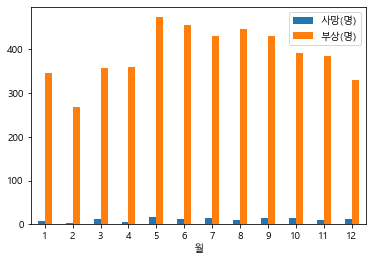

In [24]:
ans2.loc[2014][['사망(명)','부상(명)']].plot(kind='bar',rot=0)
plt.show();

In [25]:
## 2015년 대비 사망이 가장 많이 증가한 2016년도의 월은?


'''
- 값이 높은 n번째 까지 출력 : nlargest

      Series.nlargest(n, keep='first')
     - n : 상의 몇 개까지 나타낼 것인가
     - keep = 'first' : 동등한 값이 있다면 제일 먼저 나온 값을 보여 준다.
     - keep = 'all' : 동등한 값을 모두 표시한다.

    Dataframe.nlargest(n, columns, keep='first')
'''


a=(ans2.loc[2016]['사망(명)'] - ans2.loc[2015]['사망(명)'])
print(a)
a.nlargest(1,keep='all')

월
1     -3
2     -2
3      3
4     -3
5      4
6      4
7      2
8    -12
9      3
10    -4
11     2
12    -4
Name: 사망(명), dtype: int64


월
5    4
6    4
Name: 사망(명), dtype: int64